In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pingouin as pg
import pandas as pd

In [2]:
mean1 = 4
mean2 = 3.8
mean3 = 7

N = 30

st_dev = 2

In [161]:
data1 = mean1 + np.random.randn(N) * st_dev
data2 = mean2 + np.random.randn(N) * st_dev
data3 = mean3 + np.random.randn(N) * st_dev

data_mat = np.vstack((data1, data2, data3)).T

df = pd.DataFrame(data_mat, columns=['d1', 'd2', 'd3'])

df.head(5)

,d1,d2,d3
0,2.193672,3.628874,8.943512
1,2.267647,2.762800,8.244194
2,1.754328,1.378492,6.598412
3,3.851949,3.880552,9.791982
4,3.703588,3.448481,6.836102


In [162]:
pg.rm_anova(data=df, detailed=True)

,Source,SS,DF,MS,F,p-unc,ng2,eps
0,Within,210.644052,2,105.322026,22.298104,6.555469e-08,0.376861,0.972743
1,Error,273.955016,58,4.723362,NaN,NaN,NaN,NaN


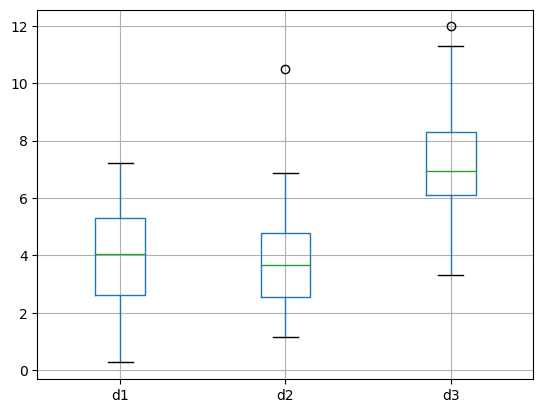

In [246]:
df.boxplot()

plt.show()

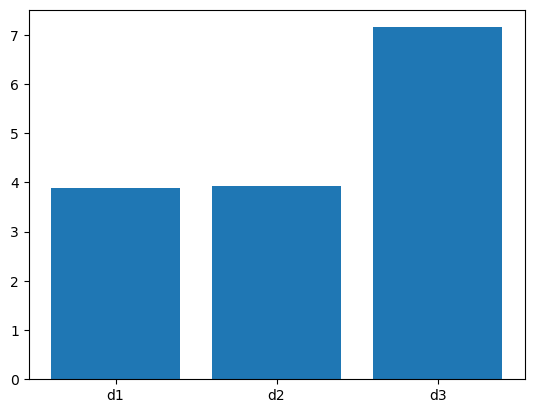

In [251]:
plt.bar(df.columns, df.mean(axis=0))

plt.show()

In [254]:
data = [
    [8, 7, 6, 7],
    [5, 8, 5, 6],
    [6, 5, 3, 4],
    [6, 6, 7, 3],
    [8, 10, 8, 6],
    [6, 5, 6, 3],
    [6, 5, 2, 3],
    [9, 9, 9, 6],
    [5, 4, 3, 7],
    [7, 6, 6, 5]
]

df = pd.DataFrame(data=data, columns=['1', '2', '3', '4'])

pg.rm_anova(data=df, detailed=True)

,Source,SS,DF,MS,F,p-unc,ng2,eps
0,Within,18.2,3,6.066667,3.615894,0.025787,0.130372,0.697356
1,Error,45.3,27,1.677778,NaN,NaN,NaN,NaN


In [288]:
subjects = np.repeat(np.arange(20), 3)
mood = np.random.randint(0, 101, len(subjects))
snack_type = np.tile(['chocolate', 'chips', 'ice cream'], 20)

df = pd.DataFrame(np.c_[subjects, mood, snack_type], columns=['Subject', 'Mood', 'Snack type'])
df['Mood'] = pd.to_numeric(df['Mood'])
df.head(5)

,Subject,Mood,Snack type
0,0,7,chocolate
1,0,86,chips
2,0,62,ice cream
3,1,81,chocolate
4,1,17,chips


In [289]:
pg.rm_anova(data=df, dv='Mood', subject='Subject', within='Snack type', detailed=True)

,Source,SS,DF,MS,F,p-unc,ng2,eps
0,Snack type,4960.000000,2,2480.000000,3.115235,0.05587,0.091014,0.988835
1,Error,30251.333333,38,796.087719,NaN,NaN,NaN,NaN


In [291]:
pg.pairwise_tukey(data=df, dv='Mood', between='Snack type')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,chips,chocolate,40.75,62.75,-22.0,9.322417,-2.359903,0.055710,-0.769542
1,chips,ice cream,40.75,48.75,-8.0,9.322417,-0.858147,0.668638,-0.263725
2,chocolate,ice cream,62.75,48.75,14.0,9.322417,1.501756,0.297730,0.448012


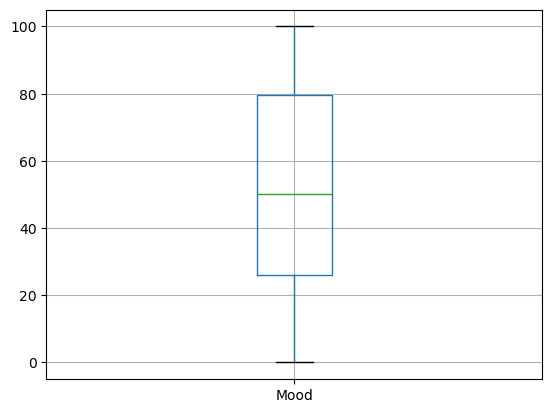

In [292]:
df.boxplot()

plt.show()